In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from src.utility.h5_serializable_file import H5Serializable
import src.utility.utils as utils 
from uncertainties import ufloat

In [2]:
class TestClass(H5Serializable):
	def __init__(self, val, val2, val3):
		self.val = val
		self.val2 = val2
		self.val3 = val3

In [3]:
test = TestClass(ufloat(1, 2), {"a": 100, "b": ufloat(4.5, 0.23)}, 2.54)

In [4]:
test.save_to_path("test.h5")

In [7]:
test2 = TestClass("hello", "world", "test")
print(test2.val, test2.val2, test2.val3)

test2.load_from_path("test.h5")
print(test2.val, test2.val2, test2.val3)
print(type(test2.val), type(test2.val2['b']), type(test2.val3))

hello world test
1.0+/-2.0 {'a': 100, 'b': 4.5+/-0.23} 2.54
<class 'uncertainties.core.Variable'> <class 'uncertainties.core.Variable'> <class 'numpy.float64'>


In [14]:
from src.wrapped_fits import WrappedFits
from src import fits_file_utils as f_utils
folder = "/home/nicho/venus/Research/TRAPPIST-1B/JWST"
visits = f_utils.get_fits_files_visits_in_folder(folder)
fits = WrappedFits(folder, visits[0], star_pixel_position = (697, 515))

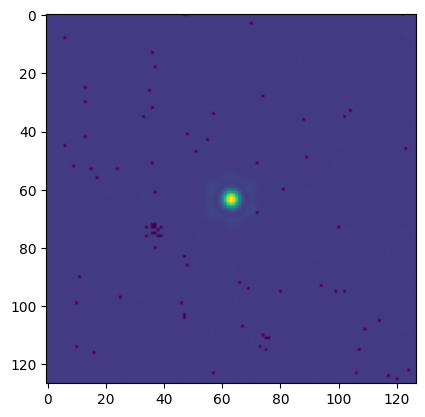

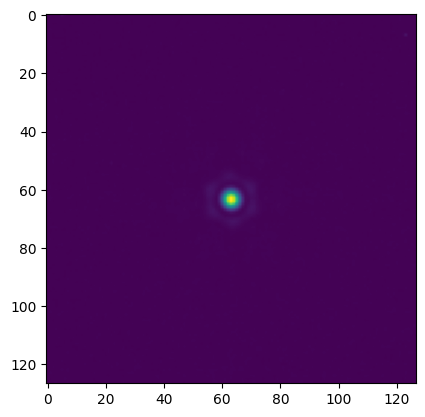

In [15]:
import matplotlib.pyplot as plt
plt.imshow(fits.raw_frames[0])
plt.show()
plt.imshow(fits.frames[0])
plt.show()